In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Alternative way of imputing
from sklearn.impute import KNNImputer

#get cosine similarity for user-user
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

# set figure size
plt.rcParams['figure.figsize'] = (12,6)

# Import movie data

In [2]:
path = 'recommender/data/ml-latest-small/ratings.csv'
df_rating = pd.read_csv(path, sep=',')
df_rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [3]:
len(df_rating['movieId'].unique())

9724

In [4]:
path1 = 'recommender/data/ml-latest-small/movies.csv'
df_movies = pd.read_csv(path1, sep=',')

df_movies['title'].count(),len(df_movies['title'].unique()) # => there are movie titles (year) included more than once

(9742, 9737)

In [5]:
#df_movies['title'].duplicated()
df_movies[df_movies.duplicated(subset=['title'],keep=False)]

,movieId,title,genres
650,838,Emma (1996),Comedy|Drama|Romance
2141,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
4169,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller
5601,26958,Emma (1996),Romance
5854,32600,Eros (2004),Drama
5931,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller
6932,64997,War of the Worlds (2005),Action|Sci-Fi
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
9135,147002,Eros (2004),Drama|Romance
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller


In [6]:
df_movies_cleaned = df_movies.drop_duplicates(subset='title', keep='first')
df_movies_cleaned

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [7]:
df_movies_cleaned['title'].count(),len(df_movies['title'].unique()) 

(9737, 9737)

**all unique titles now**

In [8]:
df_rating.shape

(100836, 4)

In [9]:
df_rating_merged = df_rating.merge(df_movies_cleaned['movieId'], on='movieId')
df_rating_merged

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,5,1,4.0,847434962
2,7,1,4.5,1106635946
3,15,1,2.5,1510577970
4,17,1,4.5,1305696483
...,...,...,...,...
100825,610,160341,2.5,1479545749
100826,610,160527,4.5,1479544998
100827,610,160836,3.0,1493844794
100828,610,163937,3.5,1493848789


In [10]:
df_movies = df_movies_cleaned
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [11]:
df_rating = df_rating_merged
df_rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,5,1,4.0,847434962
2,7,1,4.5,1106635946
3,15,1,2.5,1510577970
4,17,1,4.5,1305696483
...,...,...,...,...
100825,610,160341,2.5,1479545749
100826,610,160527,4.5,1479544998
100827,610,160836,3.0,1493844794
100828,610,163937,3.5,1493848789


# movie, ratings by users

In [12]:
# movie, ratings by users
R = df_rating.set_index(['movieId', 'userId'])['rating'].unstack(0)

In [13]:
type(R)

pandas.core.frame.DataFrame

In [14]:
R

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#make R.column labels movie titles
R_movieIds = pd.DataFrame(R.columns)
titles = R_movieIds.merge(df_movies, on='movieId')
R.columns = titles['title']
R

title,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Gintama: The Movie (2010),anohana: The Flower We Saw That Day - The Movie (2013),Silver Spoon (2014),Love Live! The School Idol Movie (2015),Jon Stewart Has Left the Building (2015),Black Butler: Book of the Atlantic (2017),No Game No Life: Zero (2017),Flint (2017),Bungo Stray Dogs: Dead Apple (2018),Andrew Dice Clay: Dice Rules (1991)
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
imputer = KNNImputer() # k-nearste neighor

In [17]:
R_imputed = pd.DataFrame(imputer.fit_transform(R), index=R.index, columns=R.columns)

# Make predictions on new user input

In [18]:
R_imputed

title,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Gintama: The Movie (2010),anohana: The Flower We Saw That Day - The Movie (2013),Silver Spoon (2014),Love Live! The School Idol Movie (2015),Jon Stewart Has Left the Building (2015),Black Butler: Book of the Atlantic (2017),No Game No Life: Zero (2017),Flint (2017),Bungo Stray Dogs: Dead Apple (2018),Andrew Dice Clay: Dice Rules (1991)
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,3.6,4.0,2.8,3.4,4.0,3.2,3.0,2.9,3.6,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
2,4.0,3.6,2.9,2.1,2.2,3.7,2.8,3.0,2.4,3.3,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
3,3.7,3.0,2.1,2.7,2.8,3.3,2.5,2.8,2.8,4.0,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
4,3.9,3.6,3.6,2.5,3.2,3.2,3.6,3.0,3.4,3.7,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
5,4.0,3.4,3.3,2.1,2.6,4.0,3.2,2.6,3.5,3.5,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,3.6,3.3,2.7,2.8,3.8,2.5,2.4,2.6,3.9,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
607,4.0,3.8,4.0,2.8,3.6,3.8,4.0,2.6,3.3,3.9,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
608,2.5,2.0,2.0,2.1,2.9,4.3,3.2,2.8,2.6,4.0,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0


# Calculate cosine similarities user-user

$v_1, v_2$ two vectors, 

$\frac{v1 \cdot v2}{\sqrt{v1 \cdot v1} \cdot \sqrt{v2 \cdot v2}} = \frac{v1 \cdot v2}{\|v1\| \|v2\|} $

In [19]:
def cosim(vec1, vec2):
    """function to calcualte the cosine similarity between two vectors"""
    
    num = np.dot(vec1, vec2)
    denom = np.sqrt(np.dot(vec1, vec1)) * np.sqrt(np.dot(vec2, vec2))
    return num / denom

In [20]:
# Create some user vectors and check the similarity
userA = R_imputed.loc[312]
userB = R_imputed.loc[99]

In [21]:
cosim(userA,userB)

0.9971055073022778

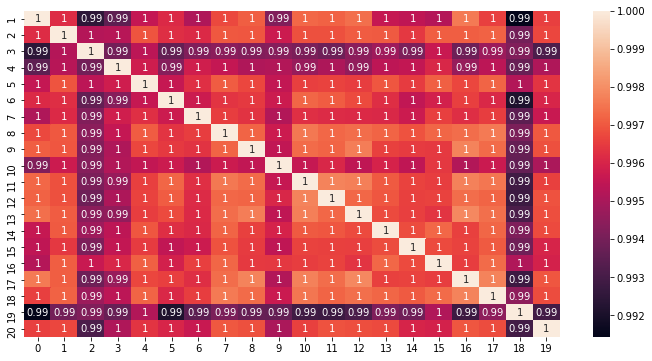

In [22]:
# Create a heatmap
sns.heatmap(cosine_similarity(R_imputed[0:20]), annot=True, yticklabels=R_imputed[0:20].index)

In [25]:
# Save the cosine similarities
cs = pd.DataFrame(cosine_similarity(R_imputed), index=R.index, columns=R_imputed.index)

In [26]:
cs.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.996211,0.992446,0.993506,0.995570,0.996140,0.995126,0.996734,0.997106,0.994213,...,0.997515,0.996156,0.991197,0.996082,0.995464,0.994855,0.996360,0.992643,0.994802,0.996078
2,0.996211,1.000000,0.995215,0.995291,0.996922,0.996245,0.996132,0.997005,0.996963,0.995731,...,0.996929,0.996468,0.993636,0.996948,0.996761,0.996474,0.996317,0.994785,0.996968,0.995923
3,0.992446,0.995215,1.000000,0.993962,0.995388,0.993635,0.994229,0.994431,0.994262,0.994314,...,0.993658,0.994415,0.992353,0.994684,0.995653,0.993688,0.993521,0.993292,0.995955,0.993476
4,0.993506,0.995291,0.993962,1.000000,0.995787,0.994333,0.995822,0.995547,0.995117,0.995180,...,0.994391,0.995278,0.992579,0.995570,0.995616,0.994765,0.994700,0.991820,0.995816,0.993542
5,0.995570,0.996922,0.995388,0.995787,1.000000,0.995587,0.996272,0.997072,0.996718,0.995513,...,0.996408,0.996713,0.993839,0.996920,0.996515,0.996316,0.996157,0.994203,0.997523,0.995357


In [27]:
cs[2].min()

0.9892520065764677

# Make prediction based on new user input

In [28]:
R.head()

title,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Gintama: The Movie (2010),anohana: The Flower We Saw That Day - The Movie (2013),Silver Spoon (2014),Love Live! The School Idol Movie (2015),Jon Stewart Has Left the Building (2015),Black Butler: Book of the Atlantic (2017),No Game No Life: Zero (2017),Flint (2017),Bungo Stray Dogs: Dead Apple (2018),Andrew Dice Clay: Dice Rules (1991)
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Create a dictionary for a new user
new_user_input = {'Toy Story (1995)': 1, 'Jumanji (1995)': 4, 'Heat (1995)': 5} # similar to JSON data that we will have to work with in the end
new_user_input

{'Toy Story (1995)': 1, 'Jumanji (1995)': 4, 'Heat (1995)': 5}

In [30]:
# Convert it to a pd.DataFrame
new_user = pd.DataFrame(new_user_input, columns=R.columns, index=[len(R.index)+1])
new_user.shape

(1, 9719)

In [31]:
R1 = R.append(new_user)
R1.shape

(611, 9719)

## Get recommendations via cosine similarity

In [32]:
# Step 2: Create an array of unseen movies for this user
unseen_movies = R1.columns[R1.loc[611].isna()]
unseen_movies.shape

(9716,)

In [33]:
R.index[-R['Grumpier Old Men (1995)'].isna()]

Int64Index([  1,   6,  19,  32,  42,  43,  44,  51,  58,  64,  68,  91, 100,
            102, 116, 117, 150, 151, 169, 179, 217, 226, 240, 269, 270, 288,
            289, 294, 302, 307, 308, 321, 330, 337, 368, 410, 414, 448, 456,
            470, 477, 480, 492, 501, 544, 552, 555, 588, 590, 594, 599, 608],
           dtype='int64', name='userId')

In [34]:
# Step 3: Find users that have seen the movies the active user has not seen:
for movie in unseen_movies: 
    other_users = R1.index[-R1[movie].isna()]
    print(movie, other_users)

Grumpier Old Men (1995) Int64Index([  1,   6,  19,  32,  42,  43,  44,  51,  58,  64,  68,  91, 100,
            102, 116, 117, 150, 151, 169, 179, 217, 226, 240, 269, 270, 288,
            289, 294, 302, 307, 308, 321, 330, 337, 368, 410, 414, 448, 456,
            470, 477, 480, 492, 501, 544, 552, 555, 588, 590, 594, 599, 608],
           dtype='int64')
Waiting to Exhale (1995) Int64Index([6, 14, 84, 162, 262, 411, 600], dtype='int64')
Father of the Bride Part II (1995) Int64Index([  6,  31,  43,  45,  58,  66,  68,  84, 103, 107, 111, 117, 120,
            121, 147, 150, 169, 170, 181, 200, 229, 269, 270, 276, 288, 321,
            337, 353, 389, 402, 414, 437, 448, 451, 456, 458, 470, 474, 483,
            489, 490, 492, 501, 509, 521, 561, 590, 600, 604],
           dtype='int64')
Sabrina (1995) Int64Index([  6,  14,  19,  31,  32,  33,  42,  43,  45,  51,  58,  68,  71,
             84,  90,  95, 117, 150, 169, 177, 179, 181, 188, 199, 206, 257,
            262, 270, 276, 280, 2

Walk in the Clouds, A (1995) Int64Index([  6,  64,  68, 113, 132, 136, 162, 170, 254, 307, 373, 414, 429,
            437, 458, 474, 559, 579, 599, 603, 606],
           dtype='int64')
Waterworld (1995) Int64Index([  6,   8,  11,  18,  19,  26,  38,  40,  43,  46,
            ...
            588, 592, 594, 599, 600, 602, 604, 607, 608, 609],
           dtype='int64', length=115)
White Man's Burden (1995) Int64Index([6, 414, 599], dtype='int64')
Wild Bill (1995) Int64Index([6, 140, 414, 599], dtype='int64')
Browning Version, The (1994) Int64Index([28, 437], dtype='int64')
Bushwhacked (1995) Int64Index([6, 226, 307], dtype='int64')
Burnt by the Sun (Utomlyonnye solntsem) (1994) Int64Index([105, 191, 229, 262, 268, 543], dtype='int64')
Before the Rain (Pred dozhdot) (1994) Int64Index([84, 603], dtype='int64')
Before Sunrise (1995) Int64Index([  4,  41, 105, 182, 191, 198, 200, 221, 227, 241, 275, 280, 382,
            385, 414, 474, 476, 490, 526, 599, 602, 603, 606, 610],
           dtyp

Tom & Viv (1994) Int64Index([84, 603], dtype='int64')
Village of the Damned (1995) Int64Index([6, 19, 274, 313, 380, 387, 493, 536, 599, 600, 604, 610], dtype='int64')
Tommy Boy (1995) Int64Index([  1,   2,   6,  19,  42,  45,  51,  56,  58,  64,  68,  69,  99,
            117, 136, 155, 169, 174, 182, 203, 225, 226, 240, 274, 276, 284,
            294, 298, 307, 335, 353, 365, 381, 386, 414, 435, 436, 477, 484,
            495, 498, 520, 555, 559, 573, 588, 590, 592, 599, 608],
           dtype='int64')
Vanya on 42nd Street (1994) Int64Index([23, 84, 262, 268, 603], dtype='int64')
Underneath (1995) Int64Index([372, 536], dtype='int64')
Walking Dead, The (1995) Int64Index([6], dtype='int64')
What's Eating Gilbert Grape (1993) Int64Index([  6,  14,  18,  28,  32,  33,  38,  40,  58,  66,  68,  74,  82,
             91,  94,  99, 103, 121, 125, 132, 136, 142, 144, 162, 174, 177,
            182, 191, 226, 242, 260, 273, 275, 286, 287, 288, 290, 307, 318,
            323, 333, 346, 349, 3

Airheads (1994) Int64Index([ 42,  43,  45,  53,  99, 136, 182, 219, 226, 240, 282, 284, 294,
            298, 307, 353, 372, 387, 414, 436, 448, 477, 541, 555, 559, 599],
           dtype='int64')
Air Up There, The (1994) Int64Index([19, 42, 217, 414, 555, 599], dtype='int64')
Another Stakeout (1993) Int64Index([6, 42, 66, 84, 181, 284, 294, 368, 414, 436, 447, 541, 555, 559,
            592, 599],
           dtype='int64')
Bad Girls (1994) Int64Index([6, 99, 136, 181, 294, 414, 536, 599], dtype='int64')
Barcelona (1994) Int64Index([4, 57, 156, 191, 199, 294, 372, 385, 391, 414, 597, 602, 603], dtype='int64')
Being Human (1993) Int64Index([42, 436], dtype='int64')
Beverly Hillbillies, The (1993) Int64Index([  6,  43,  58,  86, 217, 226, 240, 294, 307, 411, 436, 477, 522,
            536, 539, 555, 590, 592, 599, 600],
           dtype='int64')
Beverly Hills Cop III (1994) Int64Index([ 19,  42,  43,  54,  56,  68,  82,  84,  91,  94,  99, 102, 117,
            135, 136, 144, 160, 170, 1

Sliver (1993) Int64Index([  6,  14,  19,  42,  58, 102, 109, 181, 262, 297, 368, 373, 385,
            411, 414, 447, 541, 592],
           dtype='int64')
Blade Runner (1982) Int64Index([ 16,  17,  18,  19,  21,  22,  23,  28,  41,  45,
            ...
            577, 580, 590, 596, 597, 599, 603, 606, 608, 610],
           dtype='int64', length=124)
Son in Law (1993) Int64Index([6, 19, 43, 181, 226, 240, 274, 294, 312, 414, 436, 477, 555, 599], dtype='int64')
So I Married an Axe Murderer (1993) Int64Index([  1,   6,  12,  19,  45,  58,  64,  91, 109, 113, 124, 147, 168,
            182, 199, 201, 226, 240, 274, 294, 297, 307, 316, 356, 387, 391,
            414, 424, 428, 431, 448, 453, 469, 474, 500, 555, 559, 597, 599,
            600, 608],
           dtype='int64')
Striking Distance (1993) Int64Index([36, 217, 368, 414, 524, 541, 559, 599], dtype='int64')
Super Mario Bros. (1993) Int64Index([  6,  19,  45,  68,  78, 160, 177, 217, 219, 226, 234, 240, 274,
            294, 380, 38

American Buffalo (1996) Int64Index([599], dtype='int64')
Alaska (1996) Int64Index([27, 314], dtype='int64')
Fled (1996) Int64Index([217, 263, 294, 304, 368, 414, 492, 599, 608], dtype='int64')
Kazaam (1996) Int64Index([19, 43, 57, 151, 240, 274, 276, 294, 456, 477, 492, 600], dtype='int64')
Larger Than Life (1996) Int64Index([151, 217, 288, 314, 555], dtype='int64')
Very Brady Sequel, A (1996) Int64Index([6, 19, 84, 90, 274, 448, 474, 479, 492, 599], dtype='int64')
Collector, The (La collectionneuse) (1967) Int64Index([318], dtype='int64')
Kaspar Hauser (1993) Int64Index([410], dtype='int64')
Adventures of Pinocchio, The (1996) Int64Index([43, 117, 151, 171, 269, 609], dtype='int64')
Joe's Apartment (1996) Int64Index([19, 51, 135, 217, 226, 307, 414, 492, 608], dtype='int64')
First Wives Club, The (1996) Int64Index([  6,  12,  19,  68,  84, 146, 177, 188, 217, 307, 314, 414, 416,
            453, 474, 484, 489, 492, 578, 587, 606],
           dtype='int64')
Ransom (1996) Int64Index([ 1

Of Human Bondage (1934) Int64Index([474], dtype='int64')
Little Lord Fauntleroy (1936) Int64Index([606], dtype='int64')
Inspector General, The (1949) Int64Index([288], dtype='int64')
39 Steps, The (1935) Int64Index([19, 51, 59, 128, 219, 221, 253, 305, 380, 387, 474], dtype='int64')
Night of the Living Dead (1968) Int64Index([ 64, 137, 186, 187, 274, 288, 290, 292, 305, 312, 313, 380, 384,
            387, 409, 414, 422, 474, 477, 505, 555, 562, 571, 590, 591, 599,
            603, 610],
           dtype='int64')
African Queen, The (1951) Int64Index([ 27,  50,  57,  59,  63, 103, 113, 131, 137, 140, 156, 186, 199,
            217, 224, 265, 271, 288, 290, 325, 345, 387, 414, 465, 474, 517,
            524, 527, 555, 572, 577, 590, 603, 606],
           dtype='int64')
Beat the Devil (1953) Int64Index([474], dtype='int64')
Cat on a Hot Tin Roof (1958) Int64Index([84, 177, 182, 202, 290, 309, 415, 474, 488, 489], dtype='int64')
Meet John Doe (1941) Int64Index([309, 414, 474, 479, 606], dt

Terminator, The (1984) Int64Index([  1,   7,  15,  17,  18,  19,  21,  28,  30,  31,
            ...
            590, 594, 597, 599, 600, 603, 606, 607, 608, 610],
           dtype='int64', length=131)
Dead Alive (Braindead) (1992) Int64Index([91, 115, 187, 274, 387, 405, 441, 462, 505, 610], dtype='int64')
Glory (1989) Int64Index([ 29,  45,  57,  60,  66,  79,  84,  91, 137, 140, 160, 177, 180,
            182, 183, 199, 202, 217, 244, 266, 288, 290, 304, 326, 339, 357,
            368, 372, 387, 409, 414, 437, 474, 480, 484, 510, 524, 532, 538,
            590, 599],
           dtype='int64')
Rosencrantz and Guildenstern Are Dead (1990) Int64Index([23, 51, 57, 66, 68, 105, 182, 246, 372, 387, 414, 469, 474, 509,
            599, 606],
           dtype='int64')
Manhattan (1979) Int64Index([ 51,  59,  84, 103, 105, 113, 132, 137, 156, 168, 177, 188, 199,
            216, 221, 298, 345, 377, 387, 391, 397, 409, 412, 445, 448, 469,
            474, 587, 597, 599, 600, 603, 606],
        

Ghosts of Mississippi (1996) Int64Index([140, 372, 599], dtype='int64')
Beavis and Butt-Head Do America (1996) Int64Index([ 12,  17,  19,  31,  44,  64,  91, 124, 151, 217, 219, 226, 234,
            266, 274, 287, 307, 313, 387, 414, 448, 453, 456, 492, 495, 552,
            555, 585, 599, 600, 608],
           dtype='int64')
La Cérémonie (1995) Int64Index([275, 603], dtype='int64')
Scream (1996) Int64Index([ 19,  32,  45,  51,  57,  64,  66,  68,  91, 100, 105, 111, 115,
            116, 128, 132, 135, 144, 163, 169, 177, 182, 195, 225, 226, 230,
            264, 274, 286, 287, 297, 304, 307, 311, 312, 354, 357, 360, 368,
            372, 380, 414, 419, 424, 425, 434, 452, 453, 456, 474, 480, 481,
            483, 484, 489, 492, 514, 527, 542, 561, 570, 571, 573, 590, 594,
            599, 600, 603, 607, 608],
           dtype='int64')
Last of the Mohicans, The (1992) Int64Index([  1,  11,  29,  39,  64,  68,  84,  91, 104, 140, 156, 177, 182,
            183, 222, 234, 244, 249, 250

Apostle, The (1997) Int64Index([85, 135, 275, 409, 422, 555, 599], dtype='int64')
Artemisia (1997) Int64Index([182, 603], dtype='int64')
Bent (1997) Int64Index([59, 85], dtype='int64')
Butcher Boy, The (1997) Int64Index([290, 603], dtype='int64')
Deconstructing Harry (1997) Int64Index([397, 414, 477, 597, 599, 600, 603, 606], dtype='int64')
Flubber (1997) Int64Index([19, 103, 111, 186, 219, 274, 294, 352, 380, 382, 432, 483, 509,
            517, 543, 608],
           dtype='int64')
For Richer or Poorer (1997) Int64Index([68, 217, 274, 388, 599], dtype='int64')
Good Will Hunting (1997) Int64Index([  2,   4,  11,  16,  18,  21,  24,  28,  33,  36,
            ...
            581, 586, 593, 596, 597, 599, 601, 603, 606, 608],
           dtype='int64', length=141)
Home Alone 3 (1997) Int64Index([234, 274, 294, 387, 590, 594, 600, 608], dtype='int64')
Midnight in the Garden of Good and Evil (1997) Int64Index([ 23,  57,  68,  85, 156, 198, 217, 221, 288, 294, 360, 368, 391,
            414,

Friday the 13th Part IV: The Final Chapter (1984) Int64Index([387, 474, 514, 546, 555, 571], dtype='int64')
Friday the 13th Part V: A New Beginning (1985) Int64Index([514, 571], dtype='int64')
Friday the 13th Part VI: Jason Lives (1986) Int64Index([160, 305, 527, 571], dtype='int64')
Friday the 13th Part VII: The New Blood (1988) Int64Index([571], dtype='int64')
Friday the 13th Part VIII: Jason Takes Manhattan (1989) Int64Index([91, 160, 571], dtype='int64')
Halloween (1978) Int64Index([ 53,  68, 172, 225, 226, 236, 249, 274, 288, 307, 312, 380, 387,
            448, 474, 480, 484, 514, 527, 561, 562, 590, 597, 599, 603, 607,
            610],
           dtype='int64')
Halloween II (1981) Int64Index([288, 380, 474, 514, 555], dtype='int64')
Halloween III: Season of the Witch (1982) Int64Index([288, 474, 514], dtype='int64')
Halloween 4: The Return of Michael Myers (1988) Int64Index([555], dtype='int64')
Halloween 5: The Revenge of Michael Myers (1989) Int64Index([546, 555], dtype='int6

Children of the Corn (1984) Int64Index([91, 260, 274, 288, 292, 307, 368, 384, 474, 571, 600], dtype='int64')
All Dogs Go to Heaven (1989) Int64Index([19, 51, 200, 217, 234, 274, 288, 377, 387, 474, 477, 484, 599, 600,
            608],
           dtype='int64')
Addams Family, The (1991) Int64Index([ 45,  51,  57,  62,  64,  68, 103, 111, 132, 135, 146, 217, 246,
            274, 283, 288, 294, 307, 325, 351, 377, 380, 381, 387, 414, 448,
            469, 474, 477, 482, 483, 489, 509, 555, 599, 600, 605, 608],
           dtype='int64')
Ever After: A Cinderella Story (1998) Int64Index([ 68, 100, 111, 177, 222, 226, 263, 381, 406, 414, 467, 474, 479,
            483, 552, 563, 594, 596, 600, 605, 606],
           dtype='int64')
Snake Eyes (1998) Int64Index([160, 182, 217, 274, 368, 369, 414, 438, 448, 452, 453, 474, 597,
            599, 608],
           dtype='int64')
Atlantic City (1980) Int64Index([156, 268, 290, 332, 414, 474, 597, 603], dtype='int64')
Autumn Sonata (Höstsonaten) (19

Glen or Glenda (1953) Int64Index([479], dtype='int64')
Godzilla (Gojira) (1954) Int64Index([51, 160, 313], dtype='int64')
Godzilla 1985: The Legend Is Reborn (Gojira) (Godzilla) (Return of Godzilla, The) (1984) Int64Index([160, 265], dtype='int64')
King Kong vs. Godzilla (Kingukongu tai Gojira) (1962) Int64Index([288, 555], dtype='int64')
King Kong (1933) Int64Index([  1,  39,  70, 177, 186, 217, 290, 312, 313, 325, 332, 345, 348,
            368, 380, 448, 469, 493, 508, 527, 532, 571, 577, 597, 599],
           dtype='int64')
King Kong (1976) Int64Index([160, 217, 288, 294, 368, 414, 448, 462, 479, 527, 555, 571, 597,
            606],
           dtype='int64')
King Kong Lives (1986) Int64Index([448], dtype='int64')
Desperately Seeking Susan (1985) Int64Index([ 19,  42,  64, 156, 186, 278, 288, 290, 294, 307, 342, 384, 391,
            409, 414, 448, 462, 474, 555, 597, 599, 600, 603, 606],
           dtype='int64')
Emerald Forest, The (1985) Int64Index([342], dtype='int64')
Fletch (

Christine (1983) Int64Index([274, 288, 387, 474, 514, 555, 571, 597, 603, 610], dtype='int64')
Night Shift (1982) Int64Index([19, 91, 217, 275, 288, 294, 310, 448, 555, 597], dtype='int64')
Airport (1970) Int64Index([448, 474, 502], dtype='int64')
Airport 1975 (1974) Int64Index([448, 597], dtype='int64')
Airport '77 (1977) Int64Index([91, 448, 555, 597], dtype='int64')
Rollercoaster (1977) Int64Index([448, 597], dtype='int64')
Towering Inferno, The (1974) Int64Index([51, 217, 288, 310, 368, 448, 469, 597, 603], dtype='int64')
Alligator (1980) Int64Index([217, 555, 599], dtype='int64')
Meteor (1979) Int64Index([175, 288, 469], dtype='int64')
Westworld (1973) Int64Index([186, 199, 202, 217, 226, 265, 267, 288, 313, 368, 380, 462, 465,
            469, 555, 577, 580, 600],
           dtype='int64')
Logan's Run (1976) Int64Index([  1,  19,  45,  95, 182, 186, 202, 217, 234, 288, 305, 313, 318,
            368, 380, 412, 414, 469, 520, 527, 552, 577, 580, 603],
           dtype='int64')
Pla

           dtype='int64')
General's Daughter, The (1999) Int64Index([7, 42, 68, 115, 146, 160, 186, 265, 274, 342, 368, 409, 465, 482,
            535],
           dtype='int64')
Ideal Husband, An (1999) Int64Index([33, 57, 104, 263, 383, 414, 489, 597, 600, 603], dtype='int64')
Legend of 1900, The (a.k.a. The Legend of the Pianist on the Ocean) (Leggenda del pianista sull'oceano) (1998) Int64Index([182, 599, 606], dtype='int64')
Run Lola Run (Lola rennt) (1998) Int64Index([  1,   4,  18,  39,  41,  63,  64,  68,  74,  79,  91,  95, 101,
            104, 110, 122, 125, 129, 135, 156, 165, 177, 182, 185, 187, 195,
            198, 199, 215, 218, 220, 221, 233, 246, 249, 260, 263, 274, 275,
            286, 287, 298, 317, 318, 322, 326, 354, 356, 369, 370, 381, 387,
            391, 414, 425, 449, 453, 454, 457, 474, 477, 480, 489, 490, 526,
            535, 560, 562, 580, 596, 597, 599, 600, 603, 606],
           dtype='int64')
Trekkies (1997) Int64Index([448, 462, 469, 474], dtype='int

Body Heat (1981) Int64Index([57, 156, 217, 275, 290, 294, 332, 547, 572, 603], dtype='int64')
Ferris Bueller's Day Off (1986) Int64Index([ 18,  19,  42,  45,  57,  63,  64,  66,  68,  70,
            ...
            587, 590, 596, 597, 599, 600, 603, 607, 608, 610],
           dtype='int64', length=109)
Year of Living Dangerously, The (1982) Int64Index([244, 288, 290, 332, 474, 547, 572, 603], dtype='int64')
High Plains Drifter (1973) Int64Index([4, 57, 115, 202, 221, 288, 380, 387, 414, 469, 597], dtype='int64')
Hang 'Em High (1968) Int64Index([57, 202, 288, 414, 448], dtype='int64')
Drunken Master (Jui kuen) (1978) Int64Index([138, 182, 183, 216, 219, 298, 450, 493, 599, 610], dtype='int64')
Conformist, The (Conformista, Il) (1970) Int64Index([50, 105, 268, 318, 603], dtype='int64')
Hairspray (1988) Int64Index([4, 108, 156, 216, 217, 307, 462, 555, 600, 603, 605], dtype='int64')
Brief Encounter (1946) Int64Index([474, 517], dtype='int64')
Razor's Edge, The (1984) Int64Index([414, 597

Holy Smoke (1999) Int64Index([368, 414, 606], dtype='int64')
Sweet and Lowdown (1999) Int64Index([199, 325, 603], dtype='int64')
Bonfire of the Vanities (1990) Int64Index([156, 294, 448, 482, 587], dtype='int64')
Daddy Long Legs (1919) Int64Index([217], dtype='int64')
Grand Illusion (La grande illusion) (1937) Int64Index([156, 275, 387, 410, 474, 477, 567], dtype='int64')
Great Santini, The (1979) Int64Index([474, 572, 603], dtype='int64')
Stealing Home (1988) Int64Index([202, 414], dtype='int64')
Two Jakes, The (1990) Int64Index([156, 599], dtype='int64')
U2: Rattle and Hum (1988) Int64Index([42, 79, 266, 414], dtype='int64')
Hell in the Pacific (1968) Int64Index([577], dtype='int64')
Cradle Will Rock (1999) Int64Index([307, 414, 599], dtype='int64')
Deuce Bigalow: Male Gigolo (1999) Int64Index([ 19,  42,  68, 115, 225, 261, 274, 280, 294, 414, 448, 453, 479,
            489, 590, 599, 608],
           dtype='int64')
Green Mile, The (1999) Int64Index([  1,  15,  17,  18,  24,  28,  45

Asphalt Jungle, The (1950) Int64Index([177, 377, 474], dtype='int64')
Searchers, The (1956) Int64Index([4, 414, 422, 474, 590, 599, 603], dtype='int64')
Big Country, The (1958) Int64Index([288, 474], dtype='int64')
Betrayed (1988) Int64Index([19, 368], dtype='int64')
Bridge at Remagen, The (1969) Int64Index([140, 202], dtype='int64')
Daughters of the Dust (1991) Int64Index([603], dtype='int64')
Ogre, The (Unhold, Der) (1996) Int64Index([414], dtype='int64')
On the Beach (1959) Int64Index([599], dtype='int64')
Taking of Pelham One Two Three, The (1974) Int64Index([275, 409, 469, 474], dtype='int64')
Volunteers (1985) Int64Index([45, 217, 294, 414, 474, 479, 514, 599], dtype='int64')
JFK (1991) Int64Index([  1,   4,  28,  57,  59,  60,  64, 160, 177, 198, 226, 274, 292,
            313, 354, 387, 391, 403, 414, 440, 442, 448, 464, 474, 480, 483,
            590, 599, 603, 606, 607],
           dtype='int64')
Who's Harry Crumb? (1989) Int64Index([19, 42, 45, 217, 294, 555, 599], dtype='in

Man with the Golden Arm, The (1955) Int64Index([555], dtype='int64')
Decline of Western Civilization, The (1981) Int64Index([137, 462], dtype='int64')
Decline of Western Civilization Part II: The Metal Years, The (1988) Int64Index([387], dtype='int64')
For a Few Dollars More (Per qualche dollaro in più) (1965) Int64Index([ 17,  18,  23,  27,  28,  29,  51,  57,  75,  91, 103, 105, 140,
            166, 168, 187, 202, 221, 249, 274, 288, 305, 387, 448, 465, 469,
            474, 499, 580, 590, 599, 606, 610],
           dtype='int64')
Magnum Force (1973) Int64Index([202, 238, 292, 380, 465], dtype='int64')
Blood Simple (1984) Int64Index([ 16,  19,  28,  51, 160, 182, 195, 221, 244, 318, 387, 391, 462,
            469, 474, 590, 599, 603, 610],
           dtype='int64')
Fabulous Baker Boys, The (1989) Int64Index([140, 202, 414, 555, 599, 606, 607], dtype='int64')
Prizzi's Honor (1985) Int64Index([19, 57, 140, 202, 216, 294, 465, 469, 606], dtype='int64')
Flatliners (1990) Int64Index([19,

Unsinkable Molly Brown, The (1964) Int64Index([216, 474], dtype='int64')
Adventures of Ichabod and Mr. Toad, The (1949) Int64Index([177, 288, 600], dtype='int64')
Strange Love of Martha Ivers, The (1946) Int64Index([474], dtype='int64')
Detour (1945) Int64Index([474, 590], dtype='int64')
Billy Elliot (2000) Int64Index([  4,  12,  20,  28,  83, 105, 132, 140, 169, 182, 198, 212, 263,
            275, 298, 307, 318, 339, 352, 390, 391, 414, 448, 453, 474, 480,
            483, 509, 517, 525, 526, 552, 560, 563, 596, 606, 610],
           dtype='int64')
Bedazzled (2000) Int64Index([ 41,  42,  51,  68,  95, 105, 122, 182, 200, 249, 274, 298, 316,
            381, 414, 422, 438, 448, 453, 460, 480, 484, 590, 599, 600, 608,
            610],
           dtype='int64')
Pay It Forward (2000) Int64Index([ 47,  51,  62,  64,  68,  73, 105, 139, 140, 175, 177, 182, 274,
            331, 367, 414, 426, 438, 450, 453, 477, 480, 489, 525, 563, 599],
           dtype='int64')
Private Eyes, The (1981) 

Fuzz (1972) Int64Index([514], dtype='int64')
Harley Davidson and the Marlboro Man (1991) Int64Index([66, 234, 414, 422, 448, 599], dtype='int64')
Losin' It (1983) Int64Index([474], dtype='int64')
Mermaids (1990) Int64Index([156, 275, 307, 599, 600, 606], dtype='int64')
Navy Seals (1990) Int64Index([42, 422, 438], dtype='int64')
Manhunter (1986) Int64Index([313, 387, 414, 474, 532, 562], dtype='int64')
Reversal of Fortune (1990) Int64Index([28, 74, 275, 387, 462, 474], dtype='int64')
Death on the Nile (1978) Int64Index([448], dtype='int64')
Revenge of the Nerds (1984) Int64Index([91, 226, 274, 275, 281, 369, 410, 414, 474, 477, 531, 599, 608], dtype='int64')
Revenge of the Nerds II: Nerds in Paradise (1987) Int64Index([51, 226, 414, 474, 514, 599], dtype='int64')
4 Little Girls (1997) Int64Index([253, 474], dtype='int64')
River's Edge (1986) Int64Index([474], dtype='int64')
Girls Just Want to Have Fun (1985) Int64Index([220, 414, 562], dtype='int64')
Longest Yard, The (1974) Int64Index(

Ernest Saves Christmas (1988) Int64Index([45, 226, 448, 599], dtype='int64')
Feds (1988) Int64Index([599], dtype='int64')
For Keeps (1988) Int64Index([367], dtype='int64')
Frantic (1988) Int64Index([288, 599, 606], dtype='int64')
Gorillas in the Mist (1988) Int64Index([51, 140, 474, 480, 489, 527, 599, 606], dtype='int64')
Great Outdoors, The (1988) Int64Index([42, 414, 474, 561, 599], dtype='int64')
High Spirits (1988) Int64Index([599], dtype='int64')
Johnny Be Good (1988) Int64Index([42, 414], dtype='int64')
Lady in White (a.k.a. The Mystery of the Lady in White) (1988) Int64Index([367, 594], dtype='int64')
The Lair of the White Worm (1988) Int64Index([3, 51, 313, 387], dtype='int64')
Land Before Time, The (1988) Int64Index([20, 234, 274, 318, 414, 477, 479, 509, 599], dtype='int64')
License to Drive (1988) Int64Index([307, 357, 414], dtype='int64')
Little Nikita (1988) Int64Index([474], dtype='int64')
Masquerade (1988) Int64Index([288], dtype='int64')
Milagro Beanfield War (1988) In

Extreme Days (2001) Int64Index([414], dtype='int64')
Joy Ride (2001) Int64Index([20, 274, 380, 608, 610], dtype='int64')
Max Keeble's Big Move (2001) Int64Index([140, 232, 414], dtype='int64')
Serendipity (2001) Int64Index([ 68, 105, 108, 159, 169, 177, 182, 198, 200, 232, 298, 381, 414,
            438, 474, 480, 483, 484, 504, 525, 562, 590, 594, 603, 606],
           dtype='int64')
Swamp, The (Ciénaga, La) (2001) Int64Index([318], dtype='int64')
Big Red One, The (1980) Int64Index([182, 477], dtype='int64')
Boogeyman, The (1980) Int64Index([594], dtype='int64')
Party, The (Boum, La) (1980) Int64Index([606], dtype='int64')
Brubaker (1980) Int64Index([292], dtype='int64')
Can't Stop the Music (1980) Int64Index([479], dtype='int64')
Changeling, The (1980) Int64Index([387, 422, 514], dtype='int64')
Coal Miner's Daughter (1980) Int64Index([307, 422, 474], dtype='int64')
Competition, The (1980) Int64Index([140, 527], dtype='int64')
Last Metro, The (Dernier métro, Le) (1980) Int64Index([606

Crossroads (2002) Int64Index([82, 232, 351, 361, 414, 438, 448], dtype='int64')
Hart's War (2002) Int64Index([140, 182, 226, 414, 427], dtype='int64')
John Q (2002) Int64Index([47, 140, 169, 182, 232, 292, 414, 427, 432, 438, 610], dtype='int64')
Return to Never Land (2002) Int64Index([97], dtype='int64')
Super Troopers (2001) Int64Index([ 20,  68,  89, 111, 122, 139, 182, 219, 226, 232, 274, 298, 307,
            318, 356, 365, 387, 448, 480, 484, 495, 573, 599, 610],
           dtype='int64')
Good Son, The (1993) Int64Index([599], dtype='int64')
Last Orders (2001) Int64Index([414], dtype='int64')
After the Fox (Caccia alla volpe) (1966) Int64Index([377, 387], dtype='int64')
Bad and the Beautiful, The (1952) Int64Index([474], dtype='int64')
Designing Woman (1957) Int64Index([474], dtype='int64')
Sleuth (1972) Int64Index([18, 105, 318], dtype='int64')
Stroszek (1977) Int64Index([387], dtype='int64')
Dragonfly (2002) Int64Index([274, 427, 558], dtype='int64')
Queen of the Damned (2002) 

Adventures of Pluto Nash, The (2002) Int64Index([222, 438, 448], dtype='int64')
Blue Crush (2002) Int64Index([111, 200, 263, 298, 307, 414, 438, 563], dtype='int64')
Mostly Martha (Bella Martha) (2001) Int64Index([474], dtype='int64')
Possession (2002) Int64Index([165, 287, 474, 594], dtype='int64')
One Hour Photo (2002) Int64Index([ 45,  64, 111, 165, 182, 274, 288, 298, 380, 425, 427, 428, 448,
            474, 480, 599, 600, 608, 610],
           dtype='int64')
Serving Sara (2002) Int64Index([89, 414], dtype='int64')
Simone (S1m0ne) (2002) Int64Index([165, 182, 298, 448, 489, 599, 606], dtype='int64')
Undisputed (2002) Int64Index([387, 414], dtype='int64')
Amy's O (a.k.a. Amy's Orgasm) (2001) Int64Index([432], dtype='int64')
Satin Rouge (2002) Int64Index([391], dtype='int64')
Care Bears Movie, The (1985) Int64Index([307, 313], dtype='int64')
Care Bears Movie II: A New Generation (1986) Int64Index([307, 313], dtype='int64')
Clash of the Titans (1981) Int64Index([186, 287, 313, 325, 4

           dtype='int64')
Heavy Metal 2000 (2000) Int64Index([182, 599], dtype='int64')
King of Comedy, The (1983) Int64Index([9, 74, 182, 275, 387, 462, 610], dtype='int64')
Love Liza (2002) Int64Index([182, 414, 474], dtype='int64')
Confessions of a Dangerous Mind (2002) Int64Index([111, 156, 182, 288, 356, 387, 414, 474, 480, 552, 580, 599, 600,
            608, 610],
           dtype='int64')
Blue Collar Comedy Tour: The Movie (2003) Int64Index([169, 274, 599], dtype='int64')
Just Married (2003) Int64Index([82, 111, 226, 232, 298, 480, 528, 594], dtype='int64')
City of Lost Souls, The (Hyôryuu-gai) (2000) Int64Index([610], dtype='int64')
Guy Thing, A (2003) Int64Index([104, 288, 307, 414], dtype='int64')
Kangaroo Jack (2003) Int64Index([232, 380], dtype='int64')
National Security (2003) Int64Index([82, 232, 274, 307, 380], dtype='int64')
City of God (Cidade de Deus) (2002) Int64Index([ 17,  41,  60,  63,  64,  74,  76,  83,  95, 103, 105, 110, 123,
            125, 131, 152, 168, 1

Breakin' (1984) Int64Index([414, 427, 448], dtype='int64')
Laputa: Castle in the Sky (Tenkû no shiro Rapyuta) (1986) Int64Index([ 16,  17,  24,  63, 105, 132, 187, 212, 246, 298, 307, 334, 380,
            387, 390, 474, 477, 483, 489, 509, 523, 596, 600, 606],
           dtype='int64')
High Society (1956) Int64Index([474, 590], dtype='int64')
Kiss Me Kate (1953) Int64Index([20], dtype='int64')
Matrix Reloaded, The (2003) Int64Index([  7,  18,  20,  21,  28,  45,  62,  63,  64,  68,  80,  91,  95,
            105, 111, 119, 129, 132, 137, 141, 160, 169, 177, 182, 187, 199,
            200, 210, 219, 220, 223, 226, 230, 232, 233, 239, 246, 247, 248,
            249, 272, 274, 286, 298, 305, 309, 311, 318, 330, 332, 354, 356,
            361, 362, 370, 371, 376, 380, 381, 382, 393, 414, 416, 419, 428,
            430, 432, 434, 438, 448, 474, 475, 477, 480, 483, 489, 490, 495,
            509, 518, 520, 525, 540, 542, 551, 560, 561, 573, 580, 586, 590,
            596, 599, 606, 608, 610

Mambo Italiano (2003) Int64Index([596], dtype='int64')
My Life Without Me (2003) Int64Index([474, 580], dtype='int64')
To Be and to Have (Être et avoir) (2002) Int64Index([474], dtype='int64')
Triplets of Belleville, The (Les triplettes de Belleville) (2003) Int64Index([ 23,  50,  66, 104, 167, 246, 253, 260, 263, 298, 318, 381, 387,
            414, 474, 477, 480, 483, 488, 525, 560, 600],
           dtype='int64')
Videodrome (1983) Int64Index([132, 182, 274, 318, 387, 440, 599, 606], dtype='int64')
Life and Debt (2001) Int64Index([462], dtype='int64')
Lagaan: Once Upon a Time in India (2001) Int64Index([408, 474, 593], dtype='int64')
Judgment at Nuremberg (1961) Int64Index([105, 309, 387, 421, 474], dtype='int64')
Brief History of Time, A (1991) Int64Index([414, 514], dtype='int64')
Leningrad Cowboys Go America (1989) Int64Index([606], dtype='int64')
Rules of the Game, The (La règle du jeu) (1939) Int64Index([89, 387, 590], dtype='int64')
Seven Brides for Seven Brothers (1954) Int64I

Hoffa (1992) Int64Index([28, 599], dtype='int64')
House of Cards (1993) Int64Index([599], dtype='int64')
Housesitter (1992) Int64Index([307, 474], dtype='int64')
Hudson Hawk (1991) Int64Index([51, 91, 448, 599], dtype='int64')
Invasion of the Body Snatchers (1978) Int64Index([75, 137, 274, 305, 339, 580], dtype='int64')
Kindergarten Cop (1990) Int64Index([51, 64, 66, 68, 169, 177, 249, 274, 282, 381, 387, 438, 474, 489,
            599, 600, 608],
           dtype='int64')
King Ralph (1991) Int64Index([599], dtype='int64')
Last Boy Scout, The (1991) Int64Index([51, 249, 448, 464, 483, 489, 561, 610], dtype='int64')
Last Tango in Paris (Ultimo tango a Parigi) (1972) Int64Index([125, 156, 346, 387, 606], dtype='int64')
Lorenzo's Oil (1992) Int64Index([28, 226, 474], dtype='int64')
Lover, The (Amant, L') (1992) Int64Index([68, 414, 606], dtype='int64')
Mr. Destiny (1990) Int64Index([474], dtype='int64')
Night of the Hunter, The (1955) Int64Index([221, 346, 387, 405, 462, 474, 590], dtype=

Hellboy (2004) Int64Index([ 18,  21,  62,  66,  68,  95, 111, 122, 166, 200, 219, 232, 246,
            249, 274, 298, 318, 331, 380, 381, 393, 414, 420, 438, 448, 477,
            480, 483, 489, 509, 520, 534, 561, 580, 590, 594, 596, 599, 605,
            608, 610],
           dtype='int64')
Prince & Me, The (2004) Int64Index([10, 104, 169, 414, 438, 563, 606], dtype='int64')
Walking Tall (2004) Int64Index([232, 274, 380, 414, 438, 480], dtype='int64')
United States of Leland, The (2003) Int64Index([608], dtype='int64')
The Alamo (2004) Int64Index([29, 140, 232, 377, 382, 414], dtype='int64')
Ella Enchanted (2004) Int64Index([104, 177, 288, 438, 509, 563, 605], dtype='int64')
Whole Ten Yards, The (2004) Int64Index([89, 140, 169, 177, 232, 414, 509], dtype='int64')
I'm Not Scared (Io non ho paura) (2003) Int64Index([474, 606], dtype='int64')
Ten Commandments, The (1956) Int64Index([387, 474, 538, 590], dtype='int64')
Dawn of the Dead (1978) Int64Index([ 63,  74,  83,  91, 122, 187, 26

Gladiator (1992) Int64Index([28, 68, 129, 239, 292, 298, 460, 594, 608], dtype='int64')
Indestructible Man (1956) Int64Index([448], dtype='int64')
Wasp Woman, The (1959) Int64Index([448], dtype='int64')
Attack of the Giant Leeches (1959) Int64Index([377, 448], dtype='int64')
Dead or Alive: Hanzaisha (1999) Int64Index([274, 610], dtype='int64')
Lola Montès (1955) Int64Index([50], dtype='int64')
Charly (1968) Int64Index([91], dtype='int64')
Lust for Life (1956) Int64Index([474], dtype='int64')
Dolce Vita, La (1960) Int64Index([74, 89, 309, 387, 474, 606], dtype='int64')
Jin Roh: The Wolf Brigade (Jin-Rô) (1998) Int64Index([50, 91, 318, 477, 599], dtype='int64')
Rush (1991) Int64Index([66], dtype='int64')
Captain Blood (1935) Int64Index([474, 590], dtype='int64')
*batteries not included (1987) Int64Index([307, 448, 477, 482, 568, 599, 600], dtype='int64')
Educating Rita (1983) Int64Index([74, 438, 599], dtype='int64')
Sansho the Bailiff (Sanshô dayû) (1954) Int64Index([387], dtype='int64'

           dtype='int64')
Roxanne (1987) Int64Index([51, 64, 68, 221, 387, 448, 474, 489, 561, 599, 606], dtype='int64')
Dr. Terror's House of Horrors (1965) Int64Index([230], dtype='int64')
Secret Society (2002) Int64Index([483], dtype='int64')
Last Starfighter, The (1984) Int64Index([28, 95, 438, 448, 561, 562, 600], dtype='int64')
Spider-Man 2 (2004) Int64Index([  7,  10,  21,  23,  28,  34,  45,  48,  62,  66,  68,  73,  77,
             91,  95, 100, 103, 104, 105, 114, 166, 167, 177, 187, 200, 210,
            218, 219, 220, 223, 226, 230, 232, 239, 249, 254, 263, 274, 288,
            292, 298, 301, 307, 328, 331, 356, 365, 370, 380, 381, 393, 414,
            428, 434, 438, 448, 459, 460, 471, 474, 475, 477, 480, 482, 483,
            534, 561, 567, 570, 573, 580, 590, 594, 596, 599, 600, 606, 608,
            610],
           dtype='int64')
Before Sunset (2004) Int64Index([105, 132, 199, 200, 221, 227, 241, 263, 280, 346, 414, 474, 490,
            560, 599],
           dtype=

Dark Star (1974) Int64Index([599], dtype='int64')
Sisters (1973) Int64Index([387], dtype='int64')
Turkish Delight (Turks fruit) (1973) Int64Index([560], dtype='int64')
California Split (1974) Int64Index([156], dtype='int64')
Emmanuelle (1974) Int64Index([318], dtype='int64')
Gone in 60 Seconds (1974) Int64Index([222, 292, 432, 599], dtype='int64')
Holy Mountain, The (Montaña sagrada, La) (1973) Int64Index([50, 600], dtype='int64')
Twelve Tasks of Asterix, The (Les douze travaux d'Astérix) (1976) Int64Index([21, 105, 318], dtype='int64')
French Connection II (1975) Int64Index([599], dtype='int64')
Irony of Fate, or Enjoy Your Bath! (Ironiya sudby, ili S legkim parom!) (1975) Int64Index([105], dtype='int64')
Passenger, The (Professione: reporter) (1975) Int64Index([74], dtype='int64')
Trilogy of Terror (1975) Int64Index([562], dtype='int64')
1900 (Novecento) (1976) Int64Index([462], dtype='int64')
Futureworld (1976) Int64Index([599], dtype='int64')
Harlan County U.S.A. (1976) Int64Index(

Interpreter, The (2005) Int64Index([140, 232, 352, 414, 480, 606], dtype='int64')
Open Water (2003) Int64Index([274, 287, 380, 414, 419], dtype='int64')
Touch of Pink (2004) Int64Index([89], dtype='int64')
Slasher (2004) Int64Index([599], dtype='int64')
Bobby Jones, Stroke of Genius (2004) Int64Index([480], dtype='int64')
Layer Cake (2004) Int64Index([ 18,  28,  55,  61,  62,  68, 122, 200, 219, 274, 380, 387, 414,
            438, 448, 553, 590, 599, 610],
           dtype='int64')
Return, The (Vozvrashcheniye) (2003) Int64Index([105, 221, 474], dtype='int64')
Flight of the Phoenix (2004) Int64Index([232, 274, 414, 480], dtype='int64')
Mean Creek (2004) Int64Index([307, 474], dtype='int64')
Ring Two, The (2005) Int64Index([232, 274, 380, 480, 608], dtype='int64')
Corporation, The (2003) Int64Index([63, 187, 221, 227, 254, 414, 428, 462, 474, 606], dtype='int64')
Yes Men, The (2003) Int64Index([187, 462], dtype='int64')
Azumi (2003) Int64Index([187, 599], dtype='int64')
In My Father's 

Palindromes (2004) Int64Index([187], dtype='int64')
Lot Like Love, A (2005) Int64Index([10, 45, 125, 175, 232, 298], dtype='int64')
King's Ransom (2005) Int64Index([232], dtype='int64')
Enron: The Smartest Guys in the Room (2005) Int64Index([68, 221, 254, 357, 438, 474], dtype='int64')
xXx: State of the Union (2005) Int64Index([232, 274, 382, 432, 610], dtype='int64')
Kingdom of Heaven (2005) Int64Index([  7,  62, 105, 139, 232, 249, 339, 380, 414, 425, 438, 480, 509,
            561, 573, 599, 610],
           dtype='int64')
House of Wax (2005) Int64Index([232, 288, 380, 387, 478, 480], dtype='int64')
Crash (2004) Int64Index([ 28,  41,  47,  51,  55,  64,  68, 129, 140, 166, 177, 200, 211,
            219, 226, 230, 232, 254, 274, 280, 288, 301, 305, 307, 317, 318,
            326, 332, 354, 356, 381, 399, 414, 425, 434, 438, 448, 474, 477,
            480, 484, 495, 525, 553, 561, 562, 580, 590, 593, 599],
           dtype='int64')
Mysterious Skin (2004) Int64Index([307, 480], dtype=

Munich (2005) Int64Index([ 22,  28,  68,  74, 122, 140, 199, 239, 254, 274, 317, 318, 326,
            339, 381, 414, 419, 434, 474, 480, 610],
           dtype='int64')
Producers, The (2005) Int64Index([7, 177, 232, 307, 414, 474, 520, 525, 590], dtype='int64')
Transamerica (2005) Int64Index([28, 288, 474, 489, 596, 606], dtype='int64')
Rumor Has It... (2005) Int64Index([111, 232, 288], dtype='int64')
Cheaper by the Dozen 2 (2005) Int64Index([140, 232, 380, 528], dtype='int64')
Fun with Dick and Jane (2005) Int64Index([177, 222, 232, 274, 288, 298, 365, 382, 414, 480, 599], dtype='int64')
Ringer, The (2005) Int64Index([89, 232, 274, 480], dtype='int64')
Casanova (2005) Int64Index([177, 288, 414], dtype='int64')
Mrs. Henderson Presents (2005) Int64Index([68, 474], dtype='int64')
Ear, The (Ucho) (1970) Int64Index([318], dtype='int64')
Luxo Jr. (1986) Int64Index([105, 318], dtype='int64')
Dentist, The (1996) Int64Index([274], dtype='int64')
New World, The (2005) Int64Index([288, 474, 480

Marine, The (2006) Int64Index([232, 380], dtype='int64')
Infamous (2006) Int64Index([382, 474], dtype='int64')
Fellini's Casanova (Il Casanova di Federico Fellini) (1976) Int64Index([318, 606], dtype='int64')
Chapayev (1934) Int64Index([89], dtype='int64')
Feast (2005) Int64Index([307, 610], dtype='int64')
Little Children (2006) Int64Index([68, 74, 288, 432], dtype='int64')
Deliver Us from Evil (2006) Int64Index([74, 474], dtype='int64')
Last King of Scotland, The (2006) Int64Index([ 28,  52, 168, 200, 211, 227, 232, 254, 282, 298, 305, 326, 330,
            414, 434, 460, 517, 522, 570, 590],
           dtype='int64')
U.S. vs. John Lennon, The (2006) Int64Index([474], dtype='int64')
Shortbus (2006) Int64Index([356, 560, 606], dtype='int64')
Children of Men (2006) Int64Index([ 15,  28,  29,  51,  52,  63,  68,  74,  80,  83,  88, 119, 122,
            125, 166, 200, 211, 219, 220, 227, 232, 239, 247, 249, 254, 258,
            274, 279, 298, 305, 307, 317, 318, 326, 331, 339, 356, 365,

I Know Who Killed Me (2007) Int64Index([599], dtype='int64')
No Reservations (2007) Int64Index([21, 177], dtype='int64')
Charlie Bartlett (2007) Int64Index([68, 298, 307, 414, 599], dtype='int64')
Bourne Ultimatum, The (2007) Int64Index([ 10,  18,  21,  22,  24,  28,  41,  45,  51,  52,  55,  63,  68,
             77,  80,  88, 111, 119, 123, 125, 139, 141, 166, 177, 189, 200,
            203, 211, 212, 219, 227, 231, 232, 233, 237, 239, 247, 249, 274,
            279, 282, 292, 301, 305, 308, 318, 326, 328, 331, 332, 352, 359,
            376, 378, 380, 381, 393, 407, 408, 413, 414, 420, 432, 445, 448,
            464, 466, 475, 503, 517, 553, 560, 561, 580, 586, 590, 596, 599,
            600, 601, 610],
           dtype='int64')
China Blue (2005) Int64Index([318], dtype='int64')
Tell No One (Ne le dis à personne) (2006) Int64Index([204, 560, 610], dtype='int64')
Superbad (2007) Int64Index([ 22,  28,  52,  62,  68,  73,  76,  89, 111, 122, 125, 141, 143,
            200, 212, 219, 22

Horton Hears a Who! (2008) Int64Index([18, 68, 212, 220, 232, 292, 305, 483], dtype='int64')
Funny Games U.S. (2007) Int64Index([125, 305, 567, 610], dtype='int64')
Counterfeiters, The (Die Fälscher) (2007) Int64Index([83, 227, 326], dtype='int64')
Mongol (2007) Int64Index([599], dtype='int64')
War Dance (2007) Int64Index([253], dtype='int64')
Love Guru, The (2008) Int64Index([249, 298, 307, 484], dtype='int64')
Diary of the Dead (2007) Int64Index([204, 274, 610], dtype='int64')
Penelope (2006) Int64Index([68, 177, 563, 605], dtype='int64')
City of Men (Cidade dos Homens) (2007) Int64Index([448], dtype='int64')
Zeitgeist: The Movie (2007) Int64Index([318, 339], dtype='int64')
Justice League: The New Frontier (2008)  Int64Index([380, 599], dtype='int64')
Heima (2007) Int64Index([105, 318, 599], dtype='int64')
Snow Angels (2007) Int64Index([356], dtype='int64')
Class, The (Klass) (2007) Int64Index([105, 326], dtype='int64')
Dark Knight, The (2008) Int64Index([  2,  10,  15,  16,  17,  18

Bolt (2008) Int64Index([ 15,  21,  68,  98, 105, 177, 249, 292, 305, 306, 328, 466, 491,
            509, 534, 561, 567, 586],
           dtype='int64')
Milk (2008) Int64Index([47, 152, 177, 215, 318, 326, 414, 462, 526, 528, 596], dtype='int64')
Twilight (2008) Int64Index([ 10,  12,  62,  73,  76,  98, 105, 111, 177, 220, 232, 280, 298,
            305, 352, 414, 495, 509, 525, 556, 563, 605],
           dtype='int64')
Children, The (2008) Int64Index([610], dtype='int64')
Transporter 3 (2008) Int64Index([28, 249, 318, 380, 599, 610], dtype='int64')
Four Christmases (2008) Int64Index([21, 89, 111], dtype='int64')
Boy in the Striped Pajamas, The (Boy in the Striped Pyjamas, The) (2008) Int64Index([153, 212, 232, 318, 339, 517], dtype='int64')
Fireproof (2008) Int64Index([103], dtype='int64')
Igor (2008) Int64Index([89, 307], dtype='int64')
Dinotopia (2002) Int64Index([318, 534, 605], dtype='int64')
Hunger (2008) Int64Index([18, 419], dtype='int64')
Punisher: War Zone (2008) Int64Index([

Green Lantern: First Flight (2009) Int64Index([380], dtype='int64')
Most Hated Family in America, The (2007) Int64Index([318, 419], dtype='int64')
Pandorum (2009) Int64Index([28, 80, 298, 305, 610], dtype='int64')
Death of a Cyclist (Muerte de un ciclista) (1955) Int64Index([318], dtype='int64')
Men Who Stare at Goats, The (2009) Int64Index([18, 50, 274, 305, 318, 352, 509, 560, 610], dtype='int64')
Hunt For Gollum, The (2009) Int64Index([605], dtype='int64')
Jennifer's Body (2009) Int64Index([111, 298], dtype='int64')
Informant!, The (2009) Int64Index([274, 318, 448], dtype='int64')
Extract (2009) Int64Index([298, 448], dtype='int64')
Final Destination, The (Final Destination 4) (Final Destination in 3-D, The) (2009) Int64Index([232, 380, 610], dtype='int64')
Gamer (2009) Int64Index([232, 249, 274, 305, 534, 560, 610], dtype='int64')
Cloudy with a Chance of Meatballs (2009) Int64Index([15, 50, 86, 89, 98, 125, 154, 177, 204, 220, 249, 298, 525, 534,
            561, 586, 610],
       

Emperor's New Groove 2: Kronk's New Groove, The (2005) Int64Index([89], dtype='int64')
Steam of Life (Miesten vuoro) (2010) Int64Index([318], dtype='int64')
Mortadelo & Filemon: The Big Adventure (La gran aventura de Mortadelo y Filemón) (2003) Int64Index([534], dtype='int64')
American Drug War: The Last White Hope (2007) Int64Index([68], dtype='int64')
Runaways, The (2010) Int64Index([414], dtype='int64')
Wild China (2008) Int64Index([339], dtype='int64')
Death at a Funeral (2010) Int64Index([318, 448], dtype='int64')
Valhalla Rising (2009) Int64Index([599], dtype='int64')
Diary of a Wimpy Kid (2010) Int64Index([103], dtype='int64')
Union: The Business Behind Getting High, The (2007) Int64Index([318], dtype='int64')
Disgrace (2008) Int64Index([405], dtype='int64')
Losers, The (2010) Int64Index([274, 414, 610], dtype='int64')
Last Song, The (2010) Int64Index([563], dtype='int64')
Cyrus (2010) Int64Index([448], dtype='int64')
Human Centipede, The (First Sequence) (2009) Int64Index([103]

Take Me Home Tonight (2011) Int64Index([448], dtype='int64')
Confessions (Kokuhaku) (2010) Int64Index([125], dtype='int64')
Adjustment Bureau, The (2011) Int64Index([ 15, 105, 125, 139, 159, 177, 246, 249, 292, 298, 305, 318, 339,
            352, 414, 448, 509, 560, 561, 582, 610],
           dtype='int64')
Mechanic, The (2011) Int64Index([119, 249, 292, 610], dtype='int64')
Hall Pass (2011) Int64Index([111, 298, 448, 610], dtype='int64')
Eagle, The (2011) Int64Index([448], dtype='int64')
I Am Number Four (2011) Int64Index([249, 292, 332, 448, 563], dtype='int64')
Battle: Los Angeles (2011) Int64Index([249, 292, 332, 448], dtype='int64')
Summer Wars (Samâ wôzu) (2009) Int64Index([534, 599, 610], dtype='int64')
Sunset Limited, The (2011) Int64Index([318], dtype='int64')
Winnie the Pooh and the Honey Tree (1966) Int64Index([21], dtype='int64')
Mars Needs Moms (2011) Int64Index([534], dtype='int64')
Scooby-Doo! Curse of the Lake Monster (2010) Int64Index([89], dtype='int64')
Winnie the P

Like Crazy (2011) Int64Index([280, 567], dtype='int64')
Muppets, The (2011) Int64Index([50, 68, 249, 298, 380, 448, 483, 517, 567, 599], dtype='int64')
Twilight Saga: Breaking Dawn - Part 1, The (2011) Int64Index([10, 111, 177, 204, 280, 483, 563], dtype='int64')
War Horse (2011) Int64Index([103, 448, 567], dtype='int64')
Rum Diary, The (2011) Int64Index([298, 318, 351, 448, 483, 560], dtype='int64')
Lifted (2006) Int64Index([610], dtype='int64')
Hipsters (Stilyagi) (2008) Int64Index([105], dtype='int64')
Another Cinderella Story (2008) Int64Index([509], dtype='int64')
Bunraku (2010) Int64Index([448], dtype='int64')
Sitter, The (2011) Int64Index([111, 298, 365, 448, 534], dtype='int64')
Extremely Loud and Incredibly Close (2011) Int64Index([426, 448], dtype='int64')
Play the Game (2009) Int64Index([509], dtype='int64')
Asterix in America (a.k.a Asterix Conquers America) (Astérix et les Indiens) (1994) Int64Index([534, 560], dtype='int64')
Asterix and the Vikings (Astérix et les Vikings

Rock of Ages (2012) Int64Index([222, 380, 448, 563], dtype='int64')
Seeking a Friend for the End of the World (2012) Int64Index([249, 414, 534], dtype='int64')
Presto (2008) Int64Index([105], dtype='int64')
Jack-Jack Attack (2005) Int64Index([105], dtype='int64')
One Man Band (2005) Int64Index([105, 308, 610], dtype='int64')
Ted (2012) Int64Index([ 18,  21,  68,  73, 111, 119, 125, 249, 256, 292, 298, 365, 380,
            414, 448, 491, 534, 563, 564, 599, 610],
           dtype='int64')
Magic Mike (2012) Int64Index([10, 68, 104, 222, 599], dtype='int64')
Dragon Ball Z: The Return of Cooler (Doragon bôru Z 6: Gekitotsu! Hyakuoku pawâ no senshi) (1992) Int64Index([380], dtype='int64')
Dragon Ball Z: Cooler's Revenge (Doragon bôru Z 5: Tobikkiri no saikyô tai saikyô) (1991) Int64Index([380, 599], dtype='int64')
Dragon Ball Z: Super Android 13! (Doragon bôru Z 7: Kyokugen batoru!! San dai sûpâ saiyajin) (1992) Int64Index([380, 599], dtype='int64')
Dragon Ball Z: Broly - The Legendary Sup

Disconnect (2012) Int64Index([153], dtype='int64')
Invincible Iron Man, The (2007) Int64Index([291], dtype='int64')
Yongary: Monster from the Deep (1967) Int64Index([448], dtype='int64')
Pain & Gain (2013) Int64Index([249, 298, 365, 380, 448], dtype='int64')
Hulk Vs. (2009) Int64Index([380], dtype='int64')
Resolution (2012) Int64Index([610], dtype='int64')
Grabbers (2012) Int64Index([610], dtype='int64')
Justice League: Doom (2012)  Int64Index([380], dtype='int64')
Grandmaster, The (Yi dai zong shi) (2013) Int64Index([567], dtype='int64')
This Is the End (2013) Int64Index([62, 111, 184, 212, 249, 292, 298, 318, 352, 365, 448, 495, 564,
            610],
           dtype='int64')
Iron Man 3 (2013) Int64Index([ 18,  21,  62,  80, 139, 153, 184, 210, 249, 291, 292, 298, 305,
            318, 331, 380, 382, 393, 448, 462, 483, 522, 534, 550, 561, 567,
            573, 582, 586, 596, 599, 610],
           dtype='int64')
English Teacher, The (2013) Int64Index([448], dtype='int64')
Mud (2012)

           dtype='int64')
Oversimplification of Her Beauty, An (2012) Int64Index([318], dtype='int64')
Bring It On: Fight to the Finish (2009) Int64Index([448], dtype='int64')
That Awkward Moment (2014) Int64Index([73, 111, 249, 563], dtype='int64')
Interstellar (2014) Int64Index([  2,  10,  15,  18,  21,  30,  49,  50,  62,  65,  73,  77,  98,
            103, 105, 112, 122, 123, 125, 141, 153, 154, 184, 196, 212, 227,
            231, 233, 247, 249, 256, 272, 279, 298, 300, 305, 306, 317, 318,
            319, 323, 326, 339, 352, 365, 366, 378, 408, 414, 417, 448, 466,
            475, 483, 487, 497, 506, 509, 511, 514, 525, 534, 550, 560, 561,
            567, 573, 581, 582, 596, 599, 601, 610],
           dtype='int64')
3 Days to Kill (2014) Int64Index([365, 567], dtype='int64')
Welcome to the Jungle (2013) Int64Index([21, 448], dtype='int64')
Non-Stop (2014) Int64Index([184, 249, 567, 610], dtype='int64')
Wrinkles (Arrugas) (2011) Int64Index([89], dtype='int64')
Garden of Words, T

Crippled Avengers (Can que) (Return of the 5 Deadly Venoms) (1981) Int64Index([610], dtype='int64')
Mr Hublot (2013) Int64Index([599], dtype='int64')
Copenhagen (2014) Int64Index([414], dtype='int64')
Simpsons: The Longest Daycare, The (2012) Int64Index([21, 105, 380], dtype='int64')
Generation War (2013) Int64Index([339], dtype='int64')
Christmas in Connecticut (1992) Int64Index([599], dtype='int64')
Leviathan (2014) Int64Index([298], dtype='int64')
Reign of Assassins (2010) Int64Index([599], dtype='int64')
Zulu (2013) Int64Index([448], dtype='int64')
Tangerines (2013) Int64Index([105], dtype='int64')
Life Partners (2014) Int64Index([448], dtype='int64')
Drive Hard (2014) Int64Index([448], dtype='int64')
New Kids Nitro (2011) Int64Index([318], dtype='int64')
Stalingrad (2013) Int64Index([534], dtype='int64')
Dead Snow 2: Red vs. Dead (2014)  Int64Index([534, 610], dtype='int64')
Volga - Volga (1938) Int64Index([89], dtype='int64')
You Are the Apple of My Eye (2011) Int64Index([534], d

           dtype='int64')
Patton Oswalt: Tragedy Plus Comedy Equals Time (2014) Int64Index([89], dtype='int64')
Wild Card (2015) Int64Index([119], dtype='int64')
Paper Towns (2015) Int64Index([62, 298], dtype='int64')
The Wedding Ringer (2015) Int64Index([73, 89, 111, 448, 564], dtype='int64')
Wyrmwood (2015) Int64Index([534], dtype='int64')
The Boy Next Door (2015) Int64Index([448], dtype='int64')
Boy Meets Girl (2015) Int64Index([89], dtype='int64')
Victoria (2015) Int64Index([18, 50, 119, 125, 526], dtype='int64')
The Dark Valley (2014) Int64Index([50], dtype='int64')
I'm Here (2010) Int64Index([599], dtype='int64')
The Last Five Years (2014) Int64Index([563], dtype='int64')
Crimson Peak (2015) Int64Index([610], dtype='int64')
Dragonheart 3: The Sorcerer's Curse (2015) Int64Index([210], dtype='int64')
Chris Rock: Bigger & Blacker (1999) Int64Index([89, 599], dtype='int64')
The Natural Love (1996) Int64Index([318], dtype='int64')
The Forgotten Space (2010) Int64Index([318], dtype='in

Kung Fu Panda: Secrets of the Masters (2011) Int64Index([586], dtype='int64')
Steve Jobs (2015) Int64Index([119, 184, 339, 448, 495, 599], dtype='int64')
Macbeth (2015) Int64Index([50], dtype='int64')
Vacation (2015) Int64Index([111, 119, 365, 448, 564, 610], dtype='int64')
Creep (2014) Int64Index([567, 610], dtype='int64')
The Face of an Angel (2015) Int64Index([448], dtype='int64')
Wild Horses (2015) Int64Index([448], dtype='int64')
Search Party (2014) Int64Index([119, 448], dtype='int64')
The Squeeze (2015) Int64Index([448], dtype='int64')
Careful What You Wish For (2015) Int64Index([448], dtype='int64')
Robot Overlords (2014) Int64Index([448], dtype='int64')
Bad Asses on the Bayou (2015) Int64Index([448], dtype='int64')
The Eye: Infinity (2005) Int64Index([89], dtype='int64')
Kiss me Kismet (2006) Int64Index([509], dtype='int64')
Da geht noch was! (2013) Int64Index([509], dtype='int64')
Villain (1971) Int64Index([329], dtype='int64')
The Lovers (2015) Int64Index([448], dtype='int64

Twinsters (2015) Int64Index([525], dtype='int64')
Cosmic Scrat-tastrophe (2015) Int64Index([89], dtype='int64')
Solace (2015) Int64Index([448], dtype='int64')
Lost in the Sun (2015) Int64Index([448], dtype='int64')
Le Maître d'école (1981) Int64Index([89], dtype='int64')
Those Happy Days (2006) Int64Index([125], dtype='int64')
The Girls (1961) Int64Index([105], dtype='int64')
The Adventures of Sherlock Holmes and Doctor Watson Int64Index([105], dtype='int64')
What Men Still Talk About (2011) Int64Index([105], dtype='int64')
The Adventures of Sherlock Holmes and Doctor Watson: The Treasures of Agra (1983) Int64Index([105], dtype='int64')
Adventures Of Sherlock Holmes And Dr. Watson: The Twentieth Century Approaches (1986) Int64Index([105], dtype='int64')
The Adventures of Sherlock Holmes and Doctor Watson: King of Blackmailers (1980) Int64Index([105], dtype='int64')
The Adventures of Sherlock Holmes and Dr. Watson: Bloody Signature (1979) Int64Index([105], dtype='int64')
Sherlock Holmes

Planet Earth (2006) Int64Index([47, 105, 184, 233, 251, 525, 599], dtype='int64')
Bo Burnham: Make Happy (2016) Int64Index([525], dtype='int64')
The Conjuring 2 (2016) Int64Index([306, 365], dtype='int64')
Pelé: Birth of a Legend (2016) Int64Index([318], dtype='int64')
Ghostbusters (2016) Int64Index([111, 125, 249, 306, 382, 414, 448, 610], dtype='int64')
Central Intelligence (2016) Int64Index([111, 125, 448, 564], dtype='int64')
O.J.: Made in America (2016) Int64Index([111], dtype='int64')
Bloodmoon (1997) Int64Index([610], dtype='int64')
Genius (2016) Int64Index([305], dtype='int64')
The Wooden Horse (1950) Int64Index([517], dtype='int64')
Jason Bourne (2016) Int64Index([18, 279, 380, 414, 448, 561, 567, 586, 596], dtype='int64')
The Maid's Room (2014) Int64Index([448], dtype='int64')
Sympathy for the Underdog (1971) Int64Index([610], dtype='int64')
The Legend of Tarzan (2016) Int64Index([125, 318, 365, 382, 408, 448], dtype='int64')
The Purge: Election Year (2016) Int64Index([21, 30

Kingsman: The Golden Circle (2017) Int64Index([18, 50, 111, 184, 212, 249, 380, 596], dtype='int64')
Ari Shaffir: Double Negative (2017) Int64Index([111], dtype='int64')
Blade Runner 2049 (2017) Int64Index([ 25,  50,  62,  68, 125, 184, 248, 249, 318, 338, 339, 380, 414,
            515, 567, 586, 599, 601],
           dtype='int64')
The Nut Job 2: Nutty by Nature (2017) Int64Index([363], dtype='int64')
Bliss (2012) Int64Index([526], dtype='int64')
Alles Inklusive (2014) Int64Index([526], dtype='int64')
Mother! (2017) Int64Index([567, 599], dtype='int64')
Icarus (2017) Int64Index([414], dtype='int64')
Cage Dive (2017) Int64Index([363], dtype='int64')
Black Mirror Int64Index([62], dtype='int64')
Boniface's Holiday (1965) Int64Index([89], dtype='int64')
American Made (2017) Int64Index([339, 414], dtype='int64')
Little Boxes (2017) Int64Index([89], dtype='int64')
Geostorm (2017) Int64Index([380], dtype='int64')
Maz Jobrani: Immigrant (2017) Int64Index([89], dtype='int64')
Sword Art Online

In [35]:
imputer = KNNImputer() # k-nearste neighor
R1_imputed = pd.DataFrame(imputer.fit_transform(R1), index=R1.index, columns=R1.columns)
R1_imputed

title,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Gintama: The Movie (2010),anohana: The Flower We Saw That Day - The Movie (2013),Silver Spoon (2014),Love Live! The School Idol Movie (2015),Jon Stewart Has Left the Building (2015),Black Butler: Book of the Atlantic (2017),No Game No Life: Zero (2017),Flint (2017),Bungo Stray Dogs: Dead Apple (2018),Andrew Dice Clay: Dice Rules (1991)
1,4.0,3.6,4.0,2.8,3.4,4.0,3.2,3.0,2.9,3.6,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
2,3.8,3.5,2.9,2.1,2.2,3.7,2.8,3.0,2.4,3.3,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
3,3.7,3.0,2.1,2.7,2.8,3.3,2.5,2.8,2.8,4.0,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
4,3.9,3.6,3.6,2.5,3.2,3.2,3.6,3.0,3.4,3.7,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
5,4.0,3.4,3.3,2.1,2.6,4.0,3.2,2.6,3.5,3.5,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,4.0,3.8,4.0,2.8,3.6,3.8,4.0,2.6,3.3,3.9,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
608,2.5,2.0,2.0,2.1,2.9,4.3,3.2,2.8,2.6,4.0,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
609,3.0,3.3,3.5,2.5,3.1,3.9,3.3,2.8,2.5,4.0,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
610,5.0,3.4,3.2,2.5,3.2,5.0,3.5,2.4,3.0,3.4,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0


In [36]:
cs1 = pd.DataFrame(cosine_similarity(R1_imputed), index=R1.index, columns=R1_imputed.index)

In [37]:
# Step 4: Create ratings for the active user
pred_ratings = [] ########CHANGED
for movie in unseen_movies: 
    other_users = R1.index[-R1[movie].isna()]
    # put in logic to select most similar users: threshold, closest three,... 
    # prediction of rating: weighted average of rating of closest neighbours
    # sum(similarity*rating)/sum(similarity)  OR  sum(ratings)/no.users
    nominator = 0
    denominator = 0
    for u in other_users:
        rating = R1.loc[u, movie]# What is the rating of the other user?
        sim = cs1.loc[611, u] # What is the similarity between active and other user
        nominator += (sim*rating)
        denominator += sim
    pred_rating = nominator/denominator
    pred_ratings.append((movie, pred_rating)) ######CHANGED

In [38]:
# Look at the rating
movie_names = []
for i in range(len(pred_ratings)):
    movie_names.append(pred_ratings[i][0])
movie_names

['Grumpier Old Men (1995)',
 'Waiting to Exhale (1995)',
 'Father of the Bride Part II (1995)',
 'Sabrina (1995)',
 'Tom and Huck (1995)',
 'Sudden Death (1995)',
 'GoldenEye (1995)',
 'American President, The (1995)',
 'Dracula: Dead and Loving It (1995)',
 'Balto (1995)',
 'Nixon (1995)',
 'Cutthroat Island (1995)',
 'Casino (1995)',
 'Sense and Sensibility (1995)',
 'Four Rooms (1995)',
 'Ace Ventura: When Nature Calls (1995)',
 'Money Train (1995)',
 'Get Shorty (1995)',
 'Copycat (1995)',
 'Assassins (1995)',
 'Powder (1995)',
 'Leaving Las Vegas (1995)',
 'Othello (1995)',
 'Now and Then (1995)',
 'Persuasion (1995)',
 'City of Lost Children, The (Cité des enfants perdus, La) (1995)',
 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 'Dangerous Minds (1995)',
 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)',
 'Babe (1995)',
 'Dead Man Walking (1995)',
 'It Takes Two (1995)',
 'Clueless (1995)',
 'Cry, the Beloved Country (1995)',
 'Richard III (1995)',
 'Dead Presidents (1995

In [39]:
pred_ratings

[('Grumpier Old Men (1995)', 3.2599135671263655),
 ('Waiting to Exhale (1995)', 2.3575766632053843),
 ('Father of the Bride Part II (1995)', 3.0716490020759872),
 ('Sabrina (1995)', 3.185395581505047),
 ('Tom and Huck (1995)', 2.8746395401887415),
 ('Sudden Death (1995)', 3.12544013833498),
 ('GoldenEye (1995)', 3.4963730987055497),
 ('American President, The (1995)', 3.671606173073235),
 ('Dracula: Dead and Loving It (1995)', 2.421346330846606),
 ('Balto (1995)', 3.1251834174235213),
 ('Nixon (1995)', 3.833545991662331),
 ('Cutthroat Island (1995)', 3.000857087075942),
 ('Casino (1995)', 3.926912342563233),
 ('Sense and Sensibility (1995)', 3.7763743116951622),
 ('Four Rooms (1995)', 3.700589036935255),
 ('Ace Ventura: When Nature Calls (1995)', 2.7273835022313593),
 ('Money Train (1995)', 2.500148346270387),
 ('Get Shorty (1995)', 3.4944805567871833),
 ('Copycat (1995)', 3.2224920713791914),
 ('Assassins (1995)', 3.1257701836754834),
 ('Powder (1995)', 3.1252784656270483),
 ('Leaving

In [40]:
preds = pd.DataFrame(pred_ratings, columns = ['movie', 'rating'])
round(preds,2)

,movie,rating
0,Grumpier Old Men (1995),3.26
1,Waiting to Exhale (1995),2.36
2,Father of the Bride Part II (1995),3.07
3,Sabrina (1995),3.19
4,Tom and Huck (1995),2.87
...,...,...
9711,Black Butler: Book of the Atlantic (2017),4.00
9712,No Game No Life: Zero (2017),3.50
9713,Flint (2017),3.50
9714,Bungo Stray Dogs: Dead Apple (2018),3.50


In [41]:
preds_sorted = preds.sort_values('rating', ascending=False)
round(preds_sorted, 2)

,movie,rating
3915,Martin Lawrence Live: Runteldat (2002),5.0
9517,Tickling Giants (2017),5.0
3844,Cherish (2002),5.0
2940,Two Family House (2000),5.0
4381,Belle époque (1992),5.0
...,...,...
8861,Survivor (2015),0.5
8394,"Haunted House 2, A (2014)",0.5
6524,Daddy Day Camp (2007),0.5
7797,Journey 2: The Mysterious Island (2012),0.5


In [42]:
top2 = round(preds_sorted.iloc[0:3], 2)
top2

,movie,rating
3915,Martin Lawrence Live: Runteldat (2002),5.0
9517,Tickling Giants (2017),5.0
3844,Cherish (2002),5.0


In [43]:
list(top2['movie'])

['Martin Lawrence Live: Runteldat (2002)',
 'Tickling Giants (2017)',
 'Cherish (2002)']

In [44]:
list(top2['rating'])

[5.0, 5.0, 5.0]